In [1]:
#imported libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#check tensorflow library version
tf.__version__

'2.3.1'

In [3]:
#importing the MNIST Fashion dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
#split the dataset into training data(images, labels) 
#and testing data(images, labels)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
#some useful information of our datasets
print(f"shape of train_images: {train_images.shape}")
print(f"shape of train_labels: {train_labels.shape}")
print(f"# of images in training: {len(train_images)}")
print(f"# of images in testing: {len(test_images)}")
print(f"datatype of train_images: {train_images[0].dtype}")

shape of train_images: (60000, 28, 28)
shape of train_labels: (60000,)
# of images in training: 60000
# of images in testing: 10000
datatype of train_images: uint8


In [8]:
#labels are integers 0 - 9 representing the type of clothing in each image
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

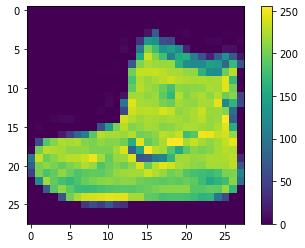

In [9]:
#each image is a 28x28 pixel img where each pixel falls between 0 - 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
#convert the images to grayscale values 0 - 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

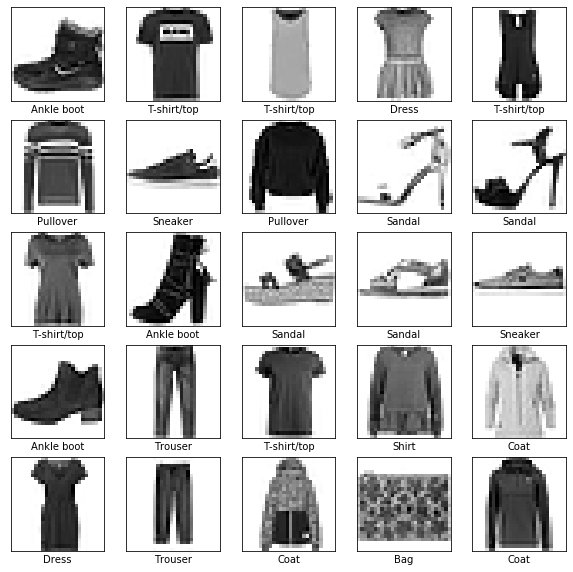

In [12]:
#check to see if images are grayscale
#display first 25 images of training set with their corresponding labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
#structure our neural network
#input layer consists of 784 neurons, flatten the image matrix
#one hidden layer with 128 neurons fully connected using relu for activation
#output layer is fully connected as well, use softmax for act. function
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [21]:
#compile model with an optimizer(minimizes our loss function), a loss function
#(measure of error "observed"-"predicted"), and a metric of accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
#train the model, fit model to training data(learning process)
#learning = adjusting model parameters(weights) to minimize the loss function
#using mini-batch SGD(STOCHASTIC GRADIENT DESCENT) to see which input weights
#to the loss function cause our model to output least error
#backpropagation algorithm: derivative chain rule
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4989 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3747 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3357 - accuracy: 0.87 - 3s 2ms/step - loss: 0.3356 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3118 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2942 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2773 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2679 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2447 - accuracy: 0.9088
Epoch 10/10
1875/1875 [=================

In [23]:
#evaluate model on test data images
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nModel Accuracy on test data = {test_acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.3653 - accuracy: 0.8725

Model Accuracy on test data = 0.8725000023841858


In [24]:
#since our model has performed worse on testing data than it did on
#traing data, we say the model is overfitted
#an overfitted model has memorized the training data too much

#making predictions attaching a softmax layer from the linear outputs(logits)
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

In [25]:
#prediction our model has made for the first test image
predictions[0]

array([5.1990614e-08, 1.3211425e-07, 8.5768242e-08, 3.6544957e-08,
       2.3794381e-07, 2.7276412e-05, 3.2615390e-06, 3.7854656e-03,
       1.5705040e-06, 9.9618196e-01], dtype=float32)

In [26]:
#above is an array of 10 probability scores where each component of the array
#responds to the probability or confidence in the 1 of 10 categories

#using np.argmax to return the arguement with the max probability
#sum of all elements in any prediction probability array = 1.0

np.argmax(predictions[0]) #model predicts first test image is category of 9

9

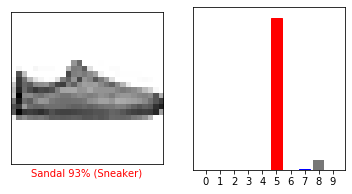

In [29]:
#verifying our models predictions for first test image


#util functions for plotting
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

#red = model has made an error
#blue = model is correct

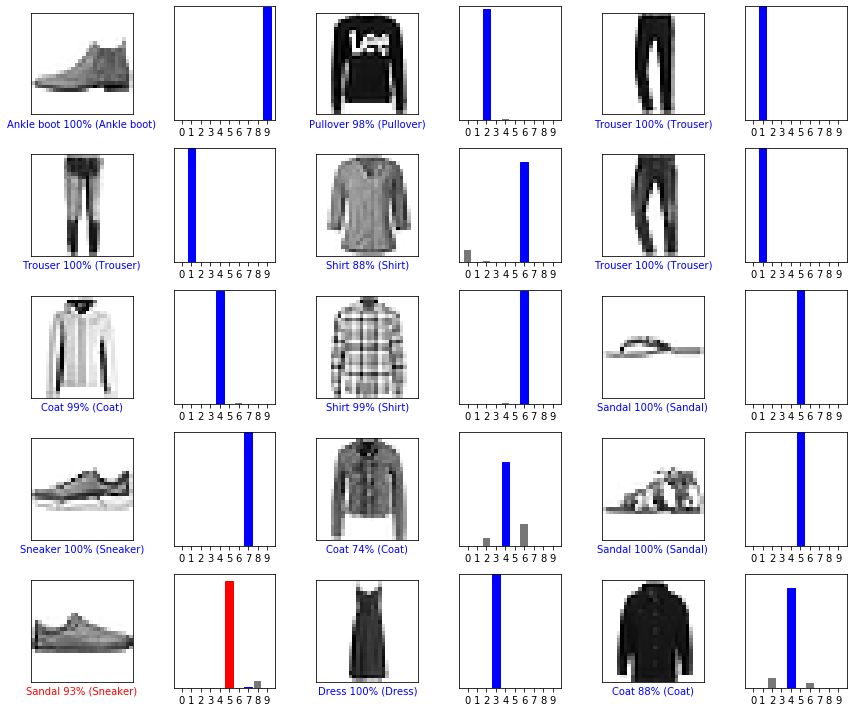

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()